In [3]:
import numpy as np
import pandas as pd
import os

np.random.seed(0)
#display(np.random.randint(50,100,1000))

data = pd.DataFrame({'Điểm thi':np.random.randint(50,100,1000)})
#display(data)

In [4]:
data['Giới tính'] = np.where(np.random.rand(1000) > 0.5, 'Nam', 'Nữ')
#display(data)
# Lấy mẫu phân tầng (25 sinh viên mỗi giới tính)
sample_stratified = data.groupby('Giới tính', group_keys=False).apply(lambda x: x.sample(25),include_groups=False)
#display(sample_stratified)
#print("Mẫu phân tầng với 25 sinh viên mỗi giới tính:\n", sample_stratified.head())

In [6]:
# Construct the path to the data file in an OS-independent way
data_dir='data'
filename='Salary_with_genders.csv'
# Get the current working directory of the script
current_dir = os.getcwd()

# Construct the path to the data file by going up one level ('..')
# and then into the 'data' folder.
file_path = os.path.join(current_dir, '..', '..', data_dir, filename)

# Normalize the path to resolve '..' and get the absolute path
file_path = os.path.abspath(file_path)

df = pd.read_csv(file_path)

# Thêm cột group_age dựa trên độ tuổi
bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '40-50', '>=50']
df['group_age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# print(df['group_age'])
# display(df)
display(df.groupby('group_age')['group_age'].count())
# Tính tỉ lệ từng group_age so với tổng số mẫu
age_ratio = df['group_age'].value_counts(normalize=True).sort_index()
print("Tỉ lệ từng nhóm tuổi so với tổng số mẫu:")
print(age_ratio)
#======================================================================
# Phương pháp 1: Sử dụng groupby().mean() (Phổ biến nhất)
#======================================================================
# chuyển cột Salary (vd. "$166,400.00") sang float và lưu vào cột float_Salary
df['str_Salary'] = df['Salary']
display(df.head())
df['Salary'] = df['Salary'].str.replace(r'[\$,]', '', regex=True).astype(float)
display(df.head())
print("--- Phương pháp 1: groupby().mean() ---")
avg_salary_groupby = df.groupby('Gender')['Salary'].mean()

# Định dạng kết quả cho dễ đọc (làm tròn 2 chữ số thập phân và có dấu phẩy)
formatted_avg_salary = avg_salary_groupby.map('{:,.2f}'.format)

print("Lương trung bình của 2 giới:")
print(formatted_avg_salary)
print("\n" + "="*50 + "\n")

C:\Users\Phuong\AppData\Local\Temp\ipykernel_24852\1972956895.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('group_age')['group_age'].count())


group_age
<30      28
30-40    86
40-50    41
>=50     19
Name: group_age, dtype: int64

Tỉ lệ từng nhóm tuổi so với tổng số mẫu:
group_age
<30      0.160920
30-40    0.494253
40-50    0.235632
>=50     0.109195
Name: proportion, dtype: float64


Surname      Name  Age  Gender        Country  \
0        Bold  Caroline   63  Female  United States   
1      Zamora  Jennifer   38  Female  United States   
2    Houlihan     Debra   51  Female  United States   
3    Bramante     Elisa   34  Female  United States   
4  Del Bosque     Keyla   38  Female  United States   

                   Ethnicity Start_date            Department  \
0                      White   7/2/2012      Executive Office   
1                      White  4/10/2010                 IT/IS   
2                      White   5/5/2014                 Sales   
3  Black or African American   1/5/2009     Production          
4  Black or African American   1/9/2012  Software Engineering   

                 Position       Salary group_age   str_Salary  
0         President & CEO  $166,400.00      >=50  $166,400.00  
1                     CIO  $135,200.00     30-40  $135,200.00  
2       Director of Sales  $124,800.00      >=50  $124,800.00  
3  Director of Operations  $124,800.00     30-40  $124,800.00  
4       Software Engineer  $118,809.60     30-40  $118,809.60

Surname      Name  Age  Gender        Country  \
0        Bold  Caroline   63  Female  United States   
1      Zamora  Jennifer   38  Female  United States   
2    Houlihan     Debra   51  Female  United States   
3    Bramante     Elisa   34  Female  United States   
4  Del Bosque     Keyla   38  Female  United States   

                   Ethnicity Start_date            Department  \
0                      White   7/2/2012      Executive Office   
1                      White  4/10/2010                 IT/IS   
2                      White   5/5/2014                 Sales   
3  Black or African American   1/5/2009     Production          
4  Black or African American   1/9/2012  Software Engineering   

                 Position    Salary group_age   str_Salary  
0         President & CEO  166400.0      >=50  $166,400.00  
1                     CIO  135200.0     30-40  $135,200.00  
2       Director of Sales  124800.0      >=50  $124,800.00  
3  Director of Operations  124800.0     30-40  $124,800.00  
4       Software Engineer  118809.6     30-40  $118,809.60

--- Phương pháp 1: groupby().mean() ---
Lương trung bình của 2 giới:
Gender
Female    65,736.91
Male      72,300.53
Name: Salary, dtype: object




In [7]:
# Kiểm tra phân phối nhóm tuổi
age_distribution = df['group_age'].value_counts().sort_index()
print("Phân phối nhóm tuổi:")
print(age_distribution)

# Hiển thị thống kê lương theo nhóm tuổi
salary_by_age = df.groupby('group_age')['Salary'].agg(['mean', 'count']).round(2)
print("\nThống kê lương theo nhóm tuổi:")
print(salary_by_age)

Phân phối nhóm tuổi:
group_age
<30      28
30-40    86
40-50    41
>=50     19
Name: count, dtype: int64

Thống kê lương theo nhóm tuổi:
               mean  count
group_age                 
<30        75478.74     28
30-40      66698.34     86
40-50      64438.91     41
>=50       76084.21     19


C:\Users\Phuong\AppData\Local\Temp\ipykernel_24852\1790923827.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_age = df.groupby('group_age')['Salary'].agg(['mean', 'count']).round(2)


In [ ]:
### lay mua ngau nhien va tinh ti le gioi tinh trong mau
sample_size = [10,20,50,100]    
for size in sample_size:
    simple_radom = df.sample(n=size, random_state=1)    
    # Tính tỉ lệ của mỗi giới tính trong mẫu
    # normalize=True sẽ trả về tỉ lệ thay vì số đếm
    gender_proportion = simple_radom['Gender'].value_counts(normalize=True)    
    #display(gender_proportion)
    # In kết quả tỉ lệ
    print(f"size {size} >>> Tỉ lệ giới tính trong mẫu:")
    print(gender_proportion)
    print("\n") # Thêm một dòng trống để dễ đọc

In [ ]:
### lay mau phan tang va tinh ti le luong tung gioi tinh tren tong luong
sample_size = [10,20,50,100]
for size in sample_size:
    # Lấy mẫu phân tầng: lấy tối đa `size` hàng trên mỗi giới tính.
    # Nếu một nhóm có ít hàng hơn `size`, ta lấy tất cả (tránh ValueError).
    stratified_random = df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))
    display(stratified_random)
    # Tính tỉ lệ của mỗi giới tính trong mẫu (normalize=True trả về tỉ lệ)
    gender_proportion = stratified_random['Gender'].value_counts(normalize=True)
    display(gender_proportion)
    # In kết quả tỉ lệ
    print(f"size {size} >>> Tỉ lệ giới tính trong mẫu:")
    print("\n") # Thêm một dòng trống để dễ đọc

In [8]:
### lay mau phan tang tren group_age va tinh ti le luong tung group_age tren tong luong
avg_salary_total = df['Salary'].mean()
print(f"Lương trung bình toàn công ty: ${avg_salary_total:,.2f}")
# sample_size = [10,20,50,100]
sample_size = [19]
for size in sample_size:   
    stratified_random_group_age = df.groupby('group_age', group_keys=False, observed=True).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))
    display(stratified_random_group_age.head())
    stratified_random_group_age.info()    
    # Tính tỉ lệ của mỗi giới tính trong mẫu (normalize=True trả về tỉ lệ)
    group_age_proportion = stratified_random_group_age['group_age'].value_counts(normalize=True)   
    # In kết quả tỉ lệ
    print("\n") # Thêm một dòng trống để dễ đọc
    print(f"size {size} >>> Tỉ lệ nhóm tuổi trong mẫu:")      
    display(group_age_proportion)
    avg_salary_per_group = stratified_random_group_age.groupby('group_age')['Salary'].mean()
    display(avg_salary_per_group)
    # 2. Tính tỉ lệ so với lương trung bình toàn công ty
    ratio_to_total_avg = avg_salary_per_group / avg_salary_total
    display(ratio_to_total_avg)

Lương trung bình toàn công ty: $68,603.78


C:\Users\Phuong\AppData\Local\Temp\ipykernel_24852\686036089.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_random_group_age = df.groupby('group_age', group_keys=False, observed=True).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))


Surname    Name  Age  Gender        Country                  Ethnicity  \
129    Murray  Thomas   29    Male  United States  Black or African American   
84      Singh     Nan   29  Female  United States                      White   
88       Ivey    Rose   27  Female  United States                      White   
103  Digitale  Alfred   29    Male  United States  Black or African American   
70     Sander  Kamrin   29  Female  United States  Black or African American   

     Start_date         Department                  Position    Salary  \
129  11/10/2014              IT/IS    Database Administrator   73840.0   
84     5/1/2015      Admin Offices  Administrative Assistant   34444.8   
88    8/19/2013  Production          Production Technician I   33280.0   
103   8/18/2014              Sales        Area Sales Manager  116480.0   
70    9/29/2014  Production          Production Technician I   43680.0   

    group_age   str_Salary  
129       <30   $73,840.00  
84        <30   $34,444.80  
88        <30   $33,280.00  
103       <30  $116,480.00  
70        <30   $43,680.00

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 129 to 55
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Surname     76 non-null     object  
 1   Name        76 non-null     object  
 2   Age         76 non-null     int64   
 3   Gender      76 non-null     object  
 4   Country     76 non-null     object  
 5   Ethnicity   76 non-null     object  
 6   Start_date  76 non-null     object  
 7   Department  76 non-null     object  
 8   Position    76 non-null     object  
 9   Salary      76 non-null     float64 
 10  group_age   76 non-null     category
 11  str_Salary  76 non-null     object  
dtypes: category(1), float64(1), int64(1), object(9)
memory usage: 7.4+ KB


size 19 >>> Tỉ lệ nhóm tuổi trong mẫu:


group_age
<30      0.25
30-40    0.25
40-50    0.25
>=50     0.25
Name: proportion, dtype: float64

C:\Users\Phuong\AppData\Local\Temp\ipykernel_24852\686036089.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_per_group = stratified_random_group_age.groupby('group_age')['Salary'].mean()


group_age
<30      80250.778947
30-40    63163.031579
40-50    68195.536842
>=50     76084.210526
Name: Salary, dtype: float64

group_age
<30      1.169772
30-40    0.920693
40-50    0.994049
>=50     1.109038
Name: Salary, dtype: float64

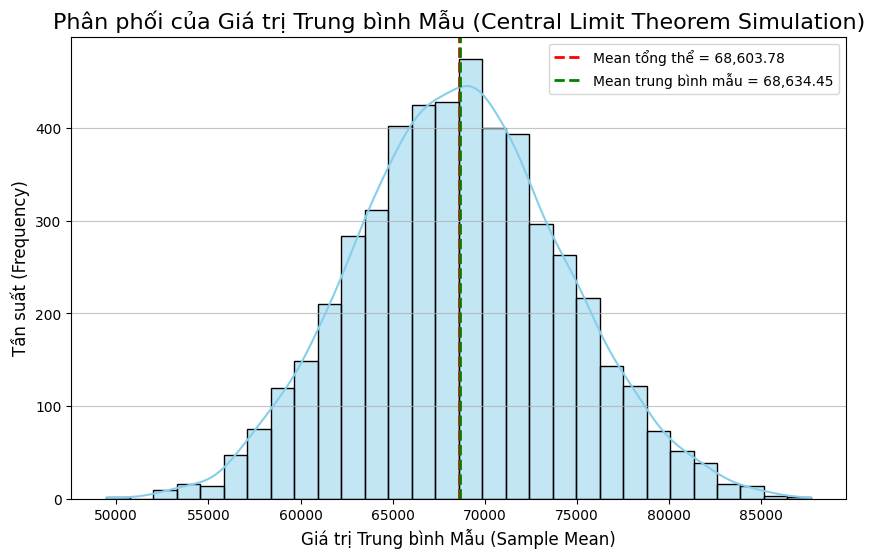

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
### mô phỏng định lý giới hạn trung tâm (Central Limit Theorem - CLT)
# Lay radom 30 mau --> tinh trung binh luong cua 20 mau --> luu vao danh sach mean_samples
# Lap lai 5000 lan --> ve bieu do histogram

size = 30                # cỡ mẫu mỗi lần lấy
num_samples = 5000         # số lần lặp (số mẫu)
mean_samples = []        # danh sách lưu giá trị trung bình của từng mẫu
for i in range(num_samples):
    clt_df = df.sample(n=size)
    mean_clt = clt_df['Salary'].mean()
    mean_samples.append(mean_clt)


# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(mean_samples, kde=True, color='skyblue', bins=30)

# Thêm đường trung bình tổng thể
population_mean  = df['Salary'].mean()
plt.axvline(population_mean, color='red', linestyle='--', linewidth=2,
            label=f'Mean tổng thể = {population_mean:,.2f}')

# Trung bình của các trung bình mẫu
sample_means_mean = np.mean(mean_samples)

# Đường trung bình của các trung bình mẫu
plt.axvline(sample_means_mean, color='green', linestyle='--', linewidth=2,
            label=f'Mean trung bình mẫu = {sample_means_mean:,.2f}')
# Trang trí biểu đồ
plt.title('Phân phối của Giá trị Trung bình Mẫu (Central Limit Theorem Simulation)', fontsize=16)
plt.xlabel('Giá trị Trung bình Mẫu (Sample Mean)', fontsize=12)
plt.ylabel('Tần suất (Frequency)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()